In [1]:
import nibabel as nib
import ipywidgets as wg
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

import gzip
import shutil
from pathlib import Path

# Anat folder analysis

In [3]:
in_path = "/home/igor/Projects/fmri-analysis/data/sub-01/anat/"
path1 = in_path + "sub-01_inplaneT2.nii"
img1 = nib.load(path1)

In [4]:
def f(width):
    plt.imshow(img1.get_fdata()[:,:,width])

slider = wg.IntSlider(value=7, min=0, max=24)
wg.interact(f, width=slider);

interactive(children=(IntSlider(value=7, description='width', max=24), Output()), _dom_classes=('widget-intera…

In [5]:
path2 = in_path + "sub-01_T1w.nii/" + "highres.nii"
img2 = nib.load(path2)

In [6]:
def f2(width):
    plt.imshow(img2.get_fdata()[width,:,:])

slider2 = wg.IntSlider(value=7, min=0, max=159)
wg.interact(f2, width=slider2);

interactive(children=(IntSlider(value=7, description='width', max=159), Output()), _dom_classes=('widget-inter…

# Func folder analysis

In [2]:
data_path = Path('/home/igor/Projects/fmri-analysis/data/sub-01')
func_path = data_path.joinpath('func')

In [8]:
for zip_file in list(func_path.glob("*.gz")):
    
    file_name = zip_file.stem
    out_path = zip_file.parent.joinpath(file_name)
    
    with gzip.open(zip_file, 'rb') as f_in:
        with open(out_path, 'wb') as f_out:
            shutil.copyfileobj(f_in, f_out)

In [3]:
path3 = list(func_path.glob("*.nii"))[0]
print(path3.name)
img3 = nib.load(path3)

sub-01_task-probabilisticclassification_run-01_bold.nii


In [10]:
def f3(time):
    plt.imshow(img3.get_fdata()[:,:,10,time])
    plt.show()

slider3 = wg.IntSlider(value=7, min=0, max=179)
wg.interact(f3, time=slider3);

interactive(children=(IntSlider(value=7, description='time', max=179), Output()), _dom_classes=('widget-intera…

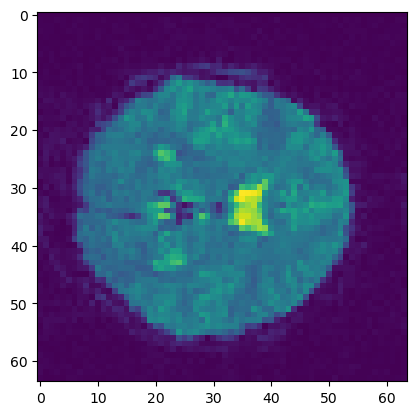

In [16]:
plt.imshow(img3.get_fdata()[:,:,10,170])

In [12]:
img3.get_fdata().shape

(64, 64, 25, 180)

In [18]:
img3.get_fdata()[30,30,10,:]

array([452., 441., 445., 444., 442., 434., 447., 443., 437., 435., 438.,
       431., 450., 433., 436., 459., 443., 432., 433., 446., 440., 433.,
       449., 458., 440., 432., 422., 429., 443., 432., 443., 448., 450.,
       431., 436., 435., 428., 451., 459., 445., 446., 446., 433., 439.,
       426., 442., 447., 436., 452., 449., 432., 432., 431., 422., 441.,
       442., 442., 449., 438., 426., 427., 443., 444., 438., 440., 448.,
       458., 420., 454., 450., 439., 441., 437., 442., 444., 442., 432.,
       447., 454., 442., 440., 440., 445., 432., 433., 445., 442., 433.,
       441., 434., 442., 436., 445., 440., 446., 448., 433., 438., 448.,
       429., 450., 452., 442., 423., 457., 431., 429., 435., 441., 449.,
       429., 428., 440., 443., 450., 431., 453., 424., 449., 436., 446.,
       456., 442., 419., 419., 445., 426., 422., 427., 438., 425., 441.,
       440., 435., 441., 435., 454., 430., 432., 439., 435., 420., 440.,
       439., 446., 447., 436., 443., 425., 442., 44

In [30]:
img3.get_fdata()[:,:,10,:].shape

(64, 64, 180)